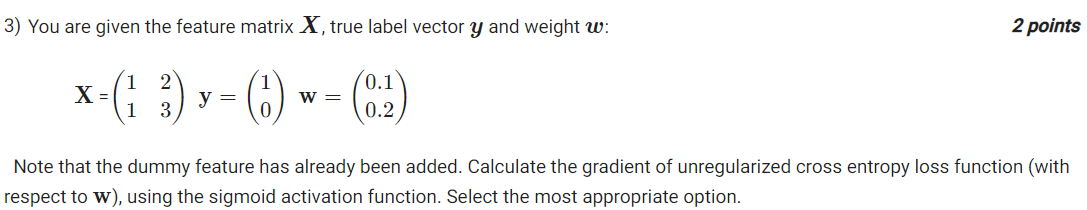

In [1]:
import numpy as np

In [2]:
class LogisticRegression():
    def set_weight_vector(self, w):
        self.w = w
    def linear_combination(self, X):
        return X @ self.w
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def activation(self, X):
        return self.sigmoid(self.linear_combination(X))
    def predict(self, X, threshold=0.5):
        return np.where(self.activation(X) > threshold, 1, 0)
    def loss(self, X, y, reg_rate):
        sigmoid_vector = self.activation(X)
        loss_orig = -1 * np.sum(y * np.log(sigmoid_vector) + (1 - y) * np.log(1 - sigmoid_vector))
        reg = reg_rate * np.dot(self.w.T, self.w)
        return loss_orig + reg
    def calculate_gradient(self, X, y, reg_rate):
        return X.T @ (self.activation(X) - y) + reg_rate * self.w
    def update_weights(self, grad, lr):
        return self.w - grad * lr
    def gd(self, X, y, num_epochs, lr, reg_rate):
        self.w = np.zeros(X.shape[1])
        self.w_all = []
        self.err_all = []
        for i in range(num_epochs):
            grad = self.calculate_gradient(X, y, reg_rate)
            self.w_all.append(self.w)
            self.err_all.append(self.loss(X, y, reg_rate))
            self.w = self.update_weights(grad, lr)
        return self.w

In [3]:
feature_matrix = np.array([[1,2],[1,3]])
weight_vector = np.array([0.1, 0.2])
label_vector = np.array([1,0])

lr = LogisticRegression()
lr.set_weight_vector(weight_vector)
lr.calculate_gradient(feature_matrix, label_vector, 0)

array([0.2906471 , 1.24948198])

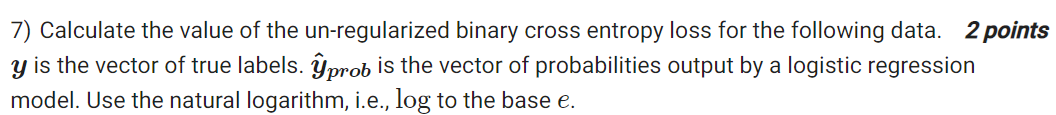

In [4]:
def loss(y, y_hat):
    loss_orig = -1 * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return loss_orig

In [5]:
y = np.array([ 1, 0, 0, 1, 0, 0, 0, 1, 1 ])
y_hat = np.array([0.9,0.3,0.25,0.88,0.1,0.1,0.6,0.9,0.75])
loss(y, y_hat)

2.397605254857639